# Decision Tree Classifier

Dataset same as previous one (Logistic Regression Imbalance).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/admin/Downloads/credit_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [4]:
# Converting into type int for simplicity
df['FAMILY SIZE'] = df['FAMILY SIZE'].astype(int)

In [5]:
# Choosing features and Target for training and testing
X = df.copy()
y = X.pop('TARGET')

In [6]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Ordinal Encoding for Categorical variables
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
s = (xtrain.dtypes == 'object')
object_cols = list(s[s].index)
label_x_train = xtrain.copy()
label_x_test = xtest.copy()
label_x_train[object_cols] = ordinal_encoder.fit_transform(xtrain[object_cols])
label_x_test[object_cols] = ordinal_encoder.transform(xtest[object_cols])

In [8]:
#Fitting Decision Tree classifier to the training set 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
clf= DecisionTreeClassifier(criterion='entropy', random_state=0, class_weight='balanced')  
clf.fit(label_x_train, ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

In [9]:
# Making predictions
y_pred = clf.predict(label_x_test)
# Evaluating the model
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9871101209420751


In [10]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[6130   47]
 [  34   73]]


In [11]:
# Precision, Recall and Fscore
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytest, y_pred, average='micro')

(0.9871101209420751, 0.9871101209420751, 0.9871101209420751, None)

In [18]:
# Plotting the tree
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 541 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 0] <= 24890.5 else to node 540.
	node=1 is a split node: go to node 2 if X[:, 16] <= 18.5 else to node 3.
		node=2 is a leaf node.
		node=3 is a split node: go to node 4 if X[:, 16] <= 46.5 else to node 283.
			node=4 is a split node: go to node 5 if X[:, 18] <= 2.5 else to node 104.
				node=5 is a split node: go to node 6 if X[:, 0] <= 16089.0 else to node 49.
					node=6 is a split node: go to node 7 if X[:, 17] <= 33.5 else to node 8.
						node=7 is a leaf node.
						node=8 is a split node: go to node 9 if X[:, 6] <= 120375.0 else to node 10.
							node=9 is a leaf node.
							node=10 is a split node: go to node 11 if X[:, 8] <= 3.5 else to node 12.
								node=11 is a leaf node.
								node=12 is a split node: go to node 13 if X[:, 1] <= 5036662.0 else to node 34.
									node=13 is a split node: go to node 14 if X[:, 1] <= 5036624.0 else to node 33.
	

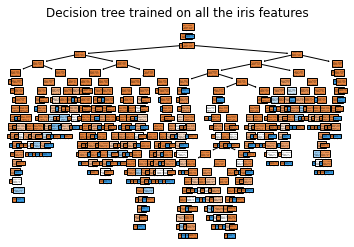

In [22]:
# Plotting the tree
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


# SMOTE

In [12]:
import imblearn

In [13]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [14]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [15]:
X1, y1 = pipeline.fit_resample(label_x_train, ytrain)
X1_test, y1_test = pipeline.fit_resample(label_x_test, ytest)

In [17]:
#Fitting Decision Tree classifier to the training set  
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=0)  
clf2.fit(X1, y1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# Making predictions
y_pred1 = clf2.predict(X1_test)

In [19]:
# Evaluating the model
print ("Accuracy : ", accuracy_score(y1_test, y_pred1))

Accuracy :  0.9254457050243112


In [20]:
#Confusion Matrix
cm = confusion_matrix(y1_test, y_pred1)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1183   51]
 [  87  530]]


In [21]:
# Precision, Recall and F-score
precision_recall_fscore_support(y1_test, y_pred1, average='weighted')

(0.925070811931641, 0.9254457050243112, 0.9248614570610229, None)